In [13]:
import torch
import torch.nn.functional as F 


import matplotlib.pyplot as plt

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

1:06:00 into the video

In [5]:
# Create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix1)
    # N[ix1, ix2] += 1

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [6]:
xs

tensor([ 0,  5, 13, 13,  1])

In [8]:
ys

tensor([ 0,  5, 13, 13,  1])

In [16]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

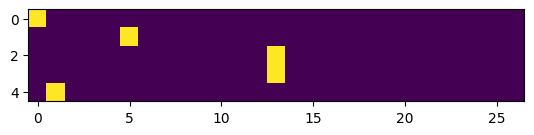

In [17]:
plt.imshow(xenc);

In [22]:
# @ this is a matrix multiplication operator in pytorch

W = torch.randn((27, 27))
xenc @ W  

tensor([[-0.5065, -1.6001,  0.1543, -1.5038,  0.6003,  0.1293,  0.3801,  0.9329,
         -0.1734,  1.0973, -0.7667, -0.4664, -1.5550,  0.6321, -0.8354, -1.0189,
          0.9538,  1.0722, -0.1760,  1.7314, -0.5848,  0.6770, -0.1518,  0.4151,
         -1.7621, -0.8457,  1.6124],
        [-0.0786,  0.4371,  1.6178,  0.8398, -1.1630,  0.5914, -0.7581, -0.9462,
         -0.8864,  0.0635, -0.2182, -1.1287, -1.6756,  0.8278, -0.3998, -0.3225,
          1.6548,  0.9399, -0.0143,  0.5533,  0.1249,  1.9361,  0.8274, -1.9637,
         -0.0043,  0.2374, -0.3217],
        [ 0.0624, -0.8057,  0.7439,  0.0466, -0.3992,  0.2192,  0.1475, -0.5697,
         -0.5436,  1.0771, -0.9591,  1.6696, -1.1074, -0.3922, -1.1530,  1.6938,
         -0.6793,  1.5330, -0.1629,  0.3364, -0.3267, -0.3821, -1.7494, -1.2651,
          0.3915, -0.9126, -0.5953],
        [ 0.0624, -0.8057,  0.7439,  0.0466, -0.3992,  0.2192,  0.1475, -0.5697,
         -0.5436,  1.0771, -0.9591,  1.6696, -1.1074, -0.3922, -1.1530,  1.6938

In [25]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0153, 0.0051, 0.0295, 0.0056, 0.0462, 0.0288, 0.0370, 0.0644, 0.0213,
         0.0759, 0.0118, 0.0159, 0.0053, 0.0476, 0.0110, 0.0091, 0.0657, 0.0740,
         0.0212, 0.1430, 0.0141, 0.0498, 0.0218, 0.0383, 0.0043, 0.0109, 0.1270],
        [0.0214, 0.0358, 0.1165, 0.0535, 0.0072, 0.0417, 0.0108, 0.0090, 0.0095,
         0.0246, 0.0186, 0.0075, 0.0043, 0.0529, 0.0155, 0.0167, 0.1209, 0.0591,
         0.0228, 0.0402, 0.0262, 0.1602, 0.0529, 0.0032, 0.0230, 0.0293, 0.0167],
        [0.0296, 0.0124, 0.0585, 0.0291, 0.0187, 0.0346, 0.0322, 0.0157, 0.0161,
         0.0817, 0.0107, 0.1477, 0.0092, 0.0188, 0.0088, 0.1513, 0.0141, 0.1288,
         0.0236, 0.0389, 0.0201, 0.0190, 0.0048, 0.0078, 0.0411, 0.0112, 0.0153],
        [0.0296, 0.0124, 0.0585, 0.0291, 0.0187, 0.0346, 0.0322, 0.0157, 0.0161,
         0.0817, 0.0107, 0.1477, 0.0092, 0.0188, 0.0088, 0.1513, 0.0141, 0.1288,
         0.0236, 0.0389, 0.0201, 0.0190, 0.0048, 0.0078, 0.0411, 0.0112, 0.0153],
        [0.0082, 0.0309,

In [28]:
probs.shape

torch.Size([5, 27])